## Assignment 8 Clustering - STUDENT

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy   import   stats
from sklearn.cluster import KMeans

In this assignment, you will use explore a The ClevelandHeart Data from the UCI Machine Learning Data Repository.
Data were collected by the Cleveland Clinic Foundation. Data are deidentified and publicly available. 

The variables are:
   + age :  age in years
   + sex : = male; 0 = female
   + cp: chest pain type 1= typical angina, 2= atypical angina, 3= non-anginal pain, 4= asymptomatic
   + trestbps: resting blood pressure in mm Hg on admission to the hospital
   + chol: serum cholesterol in mg/dl
   + fbs :  fasting blood sugar > 120 mg/dl
   + restecg : resting electrocardiographic results 
           + 0: normal
           + 1: having ST-T wave abnormality T wave inversions and/or ST + elevation or depression of > 0.05 mV
           + 2: showing probable or definite left ventricular hypertrophy
   + thalach :  maximum heart rate achieved
   + exang: exercise induced angina 1 = yes; 0 = no
   + oldpeak : ST depression induced by exercise relative to rest
   + slope: the slope of the peak exercise ST segment 1: upsloping, 2: flat, 3: down sloping
   + ca : number of major vessels 0–3 colored by fluoroscopy
   + thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

In [6]:
# We will explore if serum cholesterol level (totchol) is associated with resting blood pressure (trestbps) ?
# read the data

df = pd.read_csv('clusterdata.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   trestbps  303 non-null    int64
 2   chol      303 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


,age,trestbps,chol
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354
5,57,140,192
6,56,140,294
7,44,120,263
8,52,172,199
9,57,150,168


In [4]:
# describe the data
df.describe()

,age,trestbps,chol
count,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026
std,9.082101,17.538143,51.830751
min,29.000000,94.000000,126.000000
25%,47.500000,120.000000,211.000000
50%,55.000000,130.000000,240.000000
75%,61.000000,140.000000,274.500000
max,77.000000,200.000000,564.000000


In [7]:
# select columns for kmeans clustering

cols = df[['trestbps', 'chol']]
cols.head()

,trestbps,chol
0,145,233
1,130,250
2,130,204
3,120,236
4,120,354


<AxesSubplot:>

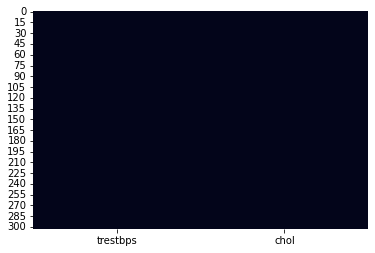

In [8]:
# check for nulls
# using heatmap to check for nulls 
sns.heatmap(cols.isnull(), cbar=False)
# no nulls

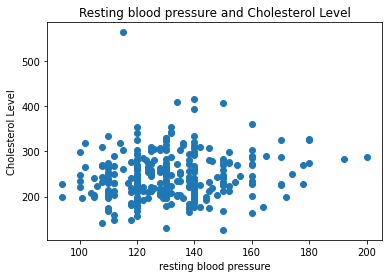

In [9]:
# scatterplot of the data with axis labels and chart title
plt.scatter(df.trestbps,df.chol)
plt.title('Resting blood pressure and Cholesterol Level');
plt.xlabel('resting blood pressure')
plt.ylabel('Cholesterol Level');

In [11]:
#### Scale data and save in original data frame 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_cols = scaler.fit_transform(cols)

# save scaled variable in the df
df['trestbpsscaled'] = scaler.fit_transform(df[['trestbps']])
df['cholscaled'] = scaler.fit_transform(df[['chol']])

# check scaling
df.head()
# scaled

,age,trestbps,chol,trestbpsscaled,cholscaled
0,63,145,233,0.481132,0.244292
1,37,130,250,0.339623,0.283105
2,41,130,204,0.339623,0.178082
3,56,120,236,0.245283,0.251142
4,57,120,354,0.245283,0.520548


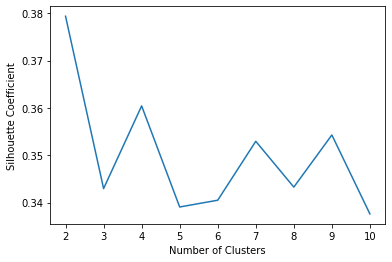

In [33]:
# # Find best number of clusters = k with sihouette score
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_cols)
    score = silhouette_score(scaled_cols, kmeans.labels_)
    silhouette_coefficients.append(score)

# plot
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show();

In [36]:
#
# Perform the KMEans clustering for the scaled data
# 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kpreds = kmeans.fit_predict(df[['trestbpsscaled','cholscaled']])
kpreds[0:10]

array([2, 2, 2, 1, 3, 2, 3, 1, 0, 2], dtype=int32)

In [37]:
# add predicted cluster number to df

df['predictions'] = kpreds
# see cluster numbers in predicted column
df.head(10)

,age,trestbps,chol,trestbpsscaled,cholscaled,predictions
0,63,145,233,0.481132,0.244292,2
1,37,130,250,0.339623,0.283105,2
2,41,130,204,0.339623,0.178082,2
3,56,120,236,0.245283,0.251142,1
4,57,120,354,0.245283,0.520548,3
5,57,140,192,0.433962,0.150685,2
6,56,140,294,0.433962,0.383562,3
7,44,120,263,0.245283,0.312785,1
8,52,172,199,0.735849,0.166667,0
9,57,150,168,0.528302,0.095890,2


In [38]:
# Scaled clusters
# get data for each cluster from the data frame
c1 = df[df.predictions==0]
c2 = df[df.predictions==1]
c3 = df[df.predictions==2]
c4 = df[df.predictions==3]

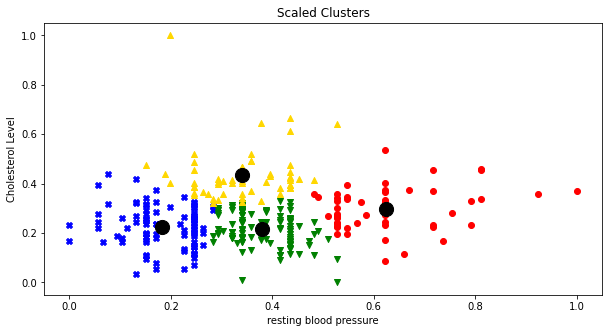

In [39]:
# plot each cluster
plt.subplots(figsize=(10, 5))

plt.scatter(c1.trestbpsscaled,c1.cholscaled,c='red', marker='o');
plt.scatter(c2.trestbpsscaled,c2.cholscaled,c='blue', marker='X');
plt.scatter(c3.trestbpsscaled,c3.cholscaled,c='green', marker='v');
plt.scatter(c4.trestbpsscaled,c4.cholscaled,c='gold', marker='^');

plt.scatter(x= kmeans.cluster_centers_[0:,0],y= kmeans.cluster_centers_[0:,1],s=200,c='black')
plt.title('Scaled Clusters')
plt.xlabel('resting blood pressure'); 
plt.ylabel('Cholesterol Level');

In [40]:
# display data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   trestbps        303 non-null    int64  
 2   chol            303 non-null    int64  
 3   trestbpsscaled  303 non-null    float64
 4   cholscaled      303 non-null    float64
 5   predictions     303 non-null    int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 13.1 KB


In [41]:
# Select group with highest Resting BP AND the total cholesterol
# note that cluster numbering starts at zero
target = df[['trestbps','chol','predictions']]
target = target[target.predictions==3]
target.head()

,trestbps,chol,predictions
4,120,354,3
6,140,294,3
11,130,275,3
16,120,340,3
28,140,417,3


In [42]:
# describe the target
target.describe()

,trestbps,chol,predictions
count,58.000000,58.000000,58.0
mean,130.017241,316.293103,3.0
std,8.758938,47.015118,0.0
min,110.000000,266.000000,3.0
25%,124.000000,293.250000,3.0
50%,130.000000,305.500000,3.0
75%,138.000000,324.250000,3.0
max,150.000000,564.000000,3.0
